In [1]:

from helpers.data import X
# from torchShiftAAregInit import torchShiftAAregInit
import torch
from torchShiftAADiscTau import torchShiftAADisc
from torchAA import torchAA
from torchNMF import NMF
from ShiftNMFDiscTau import ShiftNMF as ShiftNMF

import matplotlib.pyplot as plt
import numpy as np


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


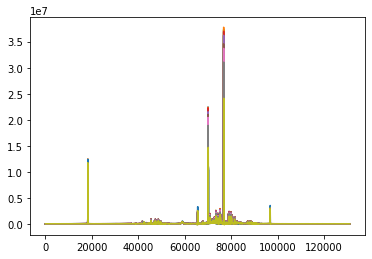

In [2]:
lim = (76700,77000)
# X = X.T[15000:80000]
# X=X.T
plt.rcParams["figure.figsize"] = (27,3)
plt.plot(X.T)

# X = X.T[68000:80500]

plt.show()

In [4]:

X.shape

(29, 131072)

In [3]:
rank = 3
trials = 10

In [11]:
best_loss_AA_reg = np.inf
best_C_reg = None
best_S_reg = None


for i in range(trials):
    print("\nTrial: ", i+1)
    reg_AA = torchAA(X, rank, lr=0.3)
    C_reg, S_reg, loss = reg_AA.fit(verbose=True, return_loss=True)
    if loss[-1] < best_loss_AA_reg:
        best_loss_AA_reg = loss[-1]
        best_C_reg = C_reg
        best_S_reg = S_reg


Trial:  1
Epoch: 166, Loss: 0.13655310270548823
Trial:  2
Epoch: 134, Loss: 0.12675189414938623
Trial:  3
Epoch: 462, Loss: 0.14198109804122822
Trial:  4
Epoch: 310, Loss: 0.12694517771590347
Trial:  5
Epoch: 270, Loss: 0.12642069725513413
Trial:  6
Epoch: 252, Loss: 0.13973342453145518
Trial:  7
Epoch: 325, Loss: 0.16068705276679849
Trial:  8
Epoch: 273, Loss: 0.12731467675735242
Trial:  9
Epoch: 206, Loss: 0.12924545342174595
Trial:  10


In [12]:
# np.save("C_reg", best_C_reg)
np.savetxt("results/urine_data/C_reg_AA.txt", best_C_reg)
np.savetxt("results/urine_data/S_reg_AA.txt", best_S_reg)

In [14]:
best_loss_AA_shift = np.inf
best_C_shift = None
best_S_shift = None
best_tau_AA = None

for i in range(trials):
    print("\nTrial: ", i+1)
    shift_AA = torchShiftAADisc(X, rank, lr=0.3)
    C_shift, S_shift, tau_AA, loss = shift_AA.fit(verbose=True, return_loss=True)
    if loss[-1] < best_loss_AA_shift:
        best_loss_AA_shift = loss[-1]
        best_C_shift = C_shift
        best_S_shift = S_shift
        best_tau_AA = tau_AA


Trial:  1
epoch: 47, Loss: 0.053979988026079624, Tau: 121.18580774991764
Trial:  2
epoch: 114, Loss: 0.046619027433332336, Tau: 103.74969879474359
Trial:  3
epoch: 34, Loss: 0.06266257124069556, Tau: 131.73078607523755
Trial:  4
epoch: 67, Loss: 0.03817571685112909, Tau: 94.345111161098335
Trial:  5
epoch: 92, Loss: 0.03740746502894257, Tau: 105.716602291220085
Trial:  6
epoch: 79, Loss: 0.04410961140757919, Tau: 136.546695309699836
Trial:  7
epoch: 81, Loss: 0.03880501678810748, Tau: 117.579760163048486
Trial:  8
epoch: 128, Loss: 0.039673109204622234, Tau: 111.79892664958818
Trial:  9
epoch: 140, Loss: 0.03502877300799284, Tau: 123.810338825156283
Trial:  10


In [15]:
np.savetxt("results/urine_data/C_shift_AA.txt", best_C_shift)
np.savetxt("results/urine_data/S_shift_AA.txt", best_S_shift)
np.savetxt("results/urine_data/tau_AA.txt", best_tau_AA)

In [5]:
best_loss_nmf_reg = np.inf
best_W_reg = None
best_H_reg = None
for i in range(trials):
    print("\nTrial: ", i+1)
    reg_nmf = NMF(X, rank, lr=0.3)
    W_reg, H_reg, loss = reg_nmf.fit(verbose=True, return_loss=True)
    if loss[-1] < best_loss_nmf_reg:
        best_loss_nmf_reg = loss[-1]
        best_W_reg = W_reg
        best_H_reg = H_reg

epoch: 945, Loss: 0.11508595775941922
Trial:  2
epoch: 1019, Loss: 0.11036264899230322
Trial:  3
epoch: 783, Loss: 0.11057289459603376
Trial:  4
epoch: 863, Loss: 0.11057882478606716
Trial:  5
epoch: 844, Loss: 0.11481791515077895
Trial:  6
epoch: 825, Loss: 0.11068044002433042
Trial:  7
epoch: 751, Loss: 0.11059432521246138
Trial:  8
epoch: 1159, Loss: 0.11550767661809164
Trial:  9
epoch: 1250, Loss: 0.11146680083455505
Trial:  10


In [6]:
np.savetxt("results/urine_data/W_reg_nmf.txt", best_W_reg)
np.savetxt("results/urine_data/H_reg_nmf.txt", best_H_reg)

In [8]:
best_loss_nmf_shift = np.inf
best_W_shift = None
best_H_shift = None
best_tau_nmf = None
for i in range(trials):
    print("\nTrial: ", i+1)
    s_nmf = ShiftNMF(X, rank, lr=0.3)
    W_shift, H_shift, tau_NMF, loss = s_nmf.fit(verbose=True, tau_thres=1e-5, return_loss=True)
    if loss[-1] < best_loss_nmf_shift:
        best_loss_nmf_shift = loss[-1]
        best_W_shift = W_shift
        best_H_shift = H_shift
        best_tau_nmf = tau_NMF


Trial:  1
epoch: 538, Loss: 0.027310408744716106, Tau: 326.11654663085945
Trial:  2
epoch: 715, Loss: 0.02646625106099075, Tau: 321.449829101562525
Trial:  3
epoch: 391, Loss: 0.03109674232616459, Tau: 267.372406005859495
Trial:  4
epoch: 736, Loss: 0.02653078798138299, Tau: 339.627746582031255
Trial:  5
epoch: 486, Loss: 0.027319977294572095, Tau: 380.92126464843755
Trial:  6
epoch: 531, Loss: 0.026920414087052414, Tau: 385.68252563476565
Trial:  7
epoch: 295, Loss: 0.03224630807670015, Tau: 254.962738037109388
Trial:  8
epoch: 645, Loss: 0.02548422702496357, Tau: 326.407714843758115
Trial:  9
epoch: 441, Loss: 0.02582385397464035, Tau: 323.689666748046995
Trial:  10


In [9]:
np.savetxt("results/urine_data/W_shift_nmf.txt", best_W_shift)
np.savetxt("results/urine_data/H_shift_nmf.txt", best_H_shift)
np.savetxt("results/urine_data/tau_nmf.txt", best_tau_nmf)

In [ ]:
s_nmf = ShiftNMF(X, rank, lr=0.3)
W, H, tau_shift = s_nmf.fit(verbose=True, tau_thres=1e-5)

In [ ]:
# recon = AA.recon.detach().resolve_conj().numpy()
# A = torch.fft.ifft(AA.A_F).detach().numpy()

# CX = A
# SCX = recon

# recon_no_shift_AA = np.matmul(S,A)


c:\Users\lucas\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


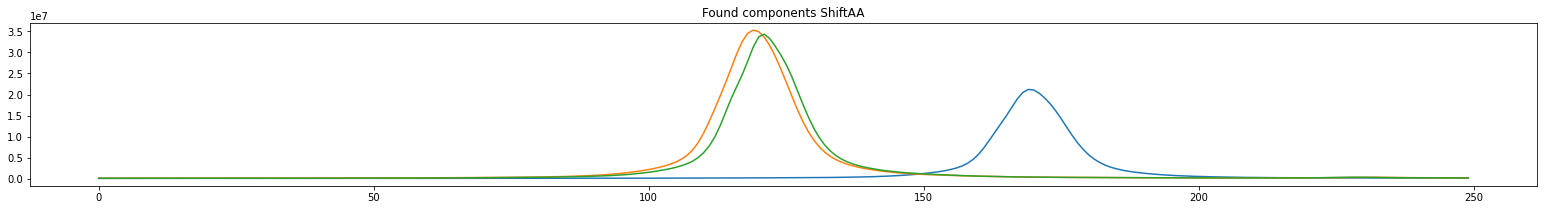

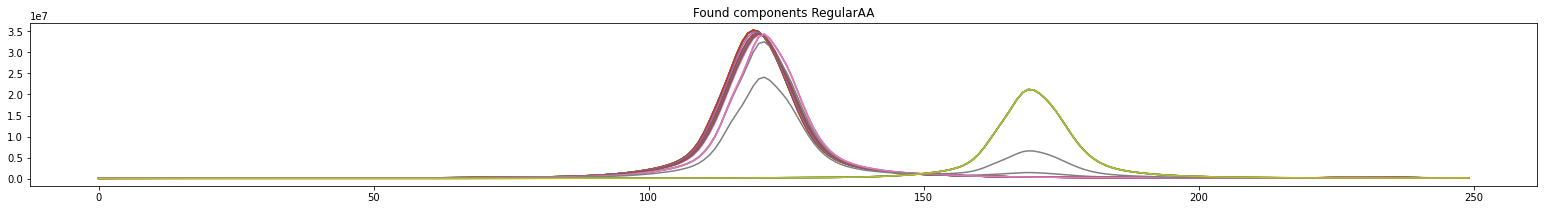

In [ ]:

# for signal in CX:
#     plt.plot(signal)
# plt.plot(CX.T[76650:76900])
# plt.title("Found components ShiftAA")
# plt.show()
# plt.plot(recon_no_shift_AA.T[76650:76900])
# plt.title("Found components RegularAA")
# plt.show()

c:\Users\lucas\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


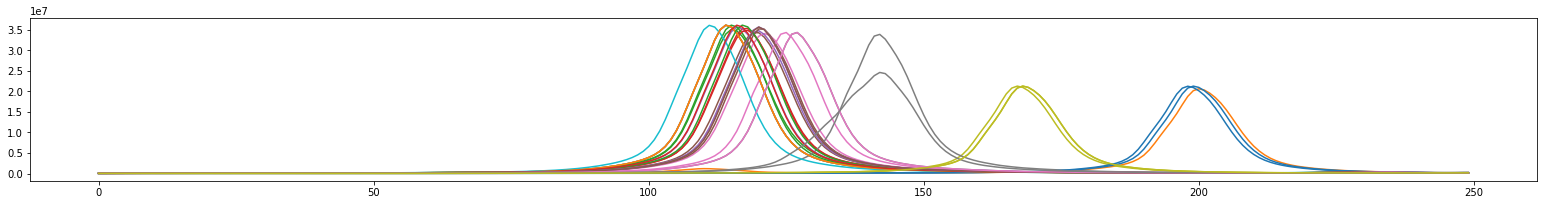

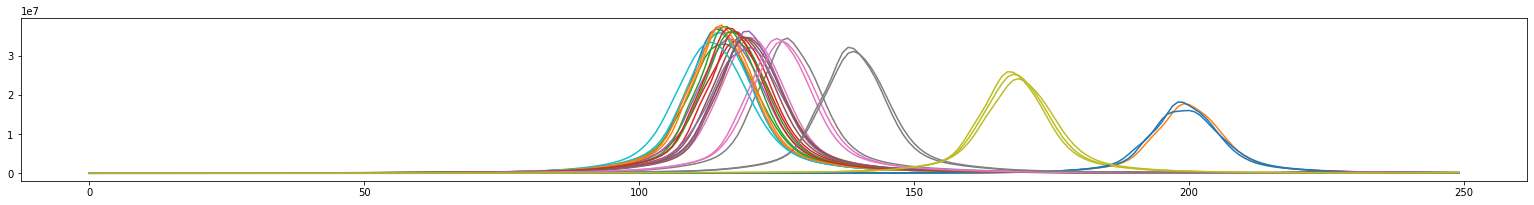

In [ ]:


# # lim = (0,125000)

# plt.plot(recon.T[76650:76900])
# #change figure size
# plt.show()

# plt.plot(X.T[76650:76900])
# plt.show()

In [ ]:
reg_nmf = NMF(X, rank, lr=0.3)
W, H = reg_nmf.fit(verbose=True)

In [ ]:
s_nmf = ShiftNMF(X, rank, lr=0.3)
W, H, tau_shift = s_nmf.fit(verbose=True, tau_thres=1e-5)

Early stopping triggered74951643110135, Tau: 216.79945373535156


(29, 250)
tensor(374203.9425, dtype=torch.float64)


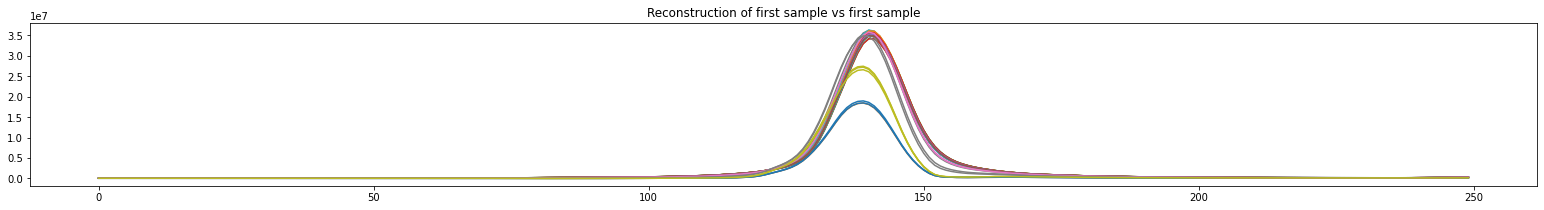

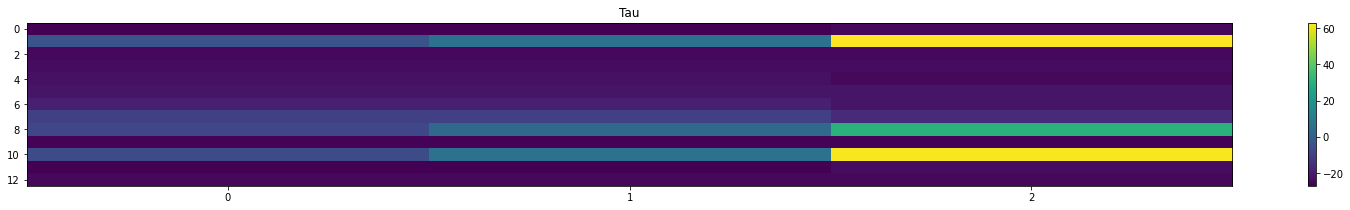

In [ ]:
recon = s_nmf.recon.detach().numpy()
recon_no_shift = np.matmul(W,H)
print(recon.T[76650:76900].T.shape)
print(s_nmf.std)
# for signal in H:
#     plt.plot(signal)
# plt.title("Found components shift NMF")
# plt.show()
plt.plot(recon_no_shift.T[76650:76900])
# plt.show()
# plt.plot(X[1])
plt.title("Reconstruction of first sample vs first sample")
plt.show()

plt.figure()
plt.imshow(tau_shift[:13], aspect='auto', interpolation="none")
ax = plt.gca()
ax.set_xticks(np.arange(0, 3, 1))
plt.colorbar()
plt.title("Tau")
plt.show()